# Filter example - cheby2 bandpass

In [ ]:
# %load ./header.py
import numpy as np
from scipy import signal
from scipy import linalg
import control
import matplotlib.pyplot as plt

import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sd_sim
import sdfpy as sdf

OSR = 256      # oversample ratio
fb = 22050     # nyquist
fs = OSR*2*fb  # sampling frequency
ts = 1/fs      # sampling period


## Bandpass Filter - 300Hz to 3kHz

In [2]:
Rs = 60
Wn = 2*np.pi*np.array([300, 3000])
ftype = 'bandpass'
N = 4

[z,p,k] = signal.cheby2(N/2,Rs,Wn,ftype, analog=True, output='zpk')
the_filter = signal.zpk2ss(z,p,k)

%store the_filter

Stored 'the_filter' (tuple)


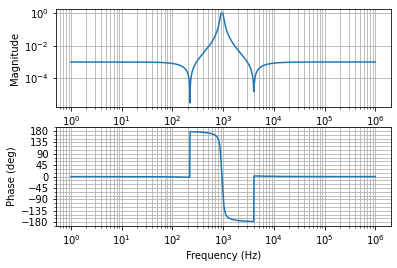

In [3]:
[A,B,C,D] = the_filter
sys = control.ss(A, B, C, D)
out = control.bode_plot(sys, Hz=True)

Goto the next step - [$\Sigma\Delta$ Conversion](./sigma_delta_conversion.ipynb)